In [1]:
# To begin using librosa we need to import it, and other tools such as matplotlib and numpy
from pylab import *
import librosa             # The librosa library
import librosa.display     # librosa's display module (for plotting features)
import IPython.display     # IPython's display module (for in-line audio)
import matplotlib.pyplot as plt # matplotlib plotting functions
import matplotlib.style as ms   # plotting style
import numpy as np              # numpy numerical functions
import pretty_midi as midi

ms.use('seaborn-muted')         # fancy plot designs

In [2]:
dic = ["G0", "B0", "C1", "E1", "D1", "F#1","G2", "B2"]
pitch = [
    [0],
    [0, 4, 0],
    [0, 2, 0, 4, 6, 4, 0, 2, 0],
    [0, 1, 0, 2, 3, 2, 0, 1, 0, 4, 5, 4, 6, 7, 6, 4, 5, 4, 0, 1, 0, 2, 3, 2, 0, 1, 0],
    [0, 1, 0, 2, 3, 2, 0, 1, 0, 4, 5, 4, 6, 7, 6, 4, 5, 4, 0, 1, 0, 2, 3, 2, 0, 1, 0] * 3
]
velocity = 80
insts = []
record = []
pm = midi.PrettyMIDI(initial_tempo=220)
# Create an Instrument instance for a cello instrument
for inst_name in ['Church Organ', 'Cello', 'Flute','Trumpet', 'Kalimba']:
    insts.append(midi.Instrument(program=midi.instrument_name_to_program(inst_name)))

In [3]:
pattern = [0, 1, 0]
le = len(dic)
def generate(length, layer, bound):
    if layer > bound:
        return
    temp = []
    ends = []
    starts = []
    for i in range(3 ** layer):
        starts.append(length * i)
        ends.append(length * (i + 1))
        flag = 1 if (i // (3**(layer - 1))) % 2 == 1 else 0
        flag += 3
        temp.append(midi.note_name_to_number(dic[pitch[layer - 1][i % (3 ** (layer - 1))]]) + flag * 12) 
    record.append(zip(temp, starts, ends))
    generate(length / 3, layer + 1, bound)

In [4]:
generate(15, 1, 5)
i = 0
for rec in record:
    for pitching, start, end in rec:
        insts[i].notes.append(midi.Note(velocity if i != 4 else velocity + 20, pitching, start, end))
    pm.instruments.append(insts[i])
    i += 1
pm.write('music.mid')

[Instrument(program=25, is_drum=False, name="A.G 1"),
 Instrument(program=33, is_drum=False, name="BASS"),
 Instrument(program=0, is_drum=False, name="A.P"),
 Instrument(program=73, is_drum=False, name="MELODY"),
 Instrument(program=30, is_drum=False, name="E.G-1"),
 Instrument(program=30, is_drum=False, name="E.G-2"),
 Instrument(program=48, is_drum=False, name="ST-L"),
 Instrument(program=48, is_drum=False, name="ST-R"),
 Instrument(program=48, is_drum=False, name="ST-C"),
 Instrument(program=0, is_drum=True, name="DRUMS"),
 Instrument(program=25, is_drum=False, name="A.G 2"),
 Instrument(program=29, is_drum=False, name="E.G-3"),
 Instrument(program=29, is_drum=False, name="E.G-3(SUB)"),
 Instrument(program=29, is_drum=False, name="E.G-4")]

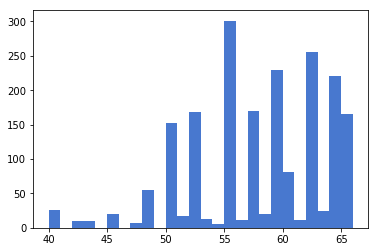

In [5]:
midi_data = midi.PrettyMIDI('./RM-P009.SMF_SYNC.MID')
display(midi_data.instruments)
notes = midi_data.instruments[0].notes
# display(notes)
# pitch
pitches = [n.pitch for n in notes]
#plt.figure(0)
plt.hist(pitches, bins = arange(min(pitches),max(pitches)))
midi_data.instruments = [midi_data.instruments[0]]
midi_data.write('melody.mid')

beat locations:
 [   0.      1.45    2.31    3.17    4.02    4.88    5.74    6.6     7.45
    8.31    9.17   10.02   10.88   11.74   12.6    13.45   14.31   15.17
   16.02   16.88   17.74   18.6    19.45   20.31   21.17   22.02   22.88
   23.74   24.6    25.45   26.31   27.17   28.02   28.88   29.74   30.59
   31.45   32.31   33.17   34.02   34.88   35.74   36.59   37.45   38.31
   39.17   40.02   40.88   41.74   42.59   43.45   44.31   45.17   46.02
   46.88   47.74   48.59   49.45   50.31   51.16   52.02   52.88   53.74
   54.59   55.45   56.31   57.16   58.02   58.88   59.74   60.59   61.45
   62.31   63.16   64.02   64.88   65.74   66.59   67.45   68.31   69.16
   70.02   70.88   71.73   72.59   73.45   74.31   75.16   76.02   76.88
   77.73   78.59   79.45   80.31   81.16   82.02   82.88   83.74   84.59
   85.45   86.3    87.16   88.02   88.88   89.73   90.59   91.45   92.31
   93.16   94.02   94.88   95.73   96.59   97.45   98.3    99.16  100.02
  100.88  101.73  102.59  103.45  

(array([ 433.,  237.,  261.,  856.,    9.,   60.,   32.,  147.,    0.,
           0.,    0.,    5.,    0.,    4.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 14 Patch objects>)

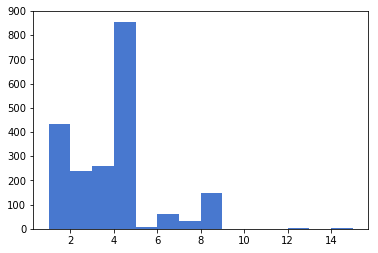

In [6]:
# duration
beats = midi_data.get_beats()
print("beat locations:\n",beats)
beat_durs = list(np.diff(beats))
#print(beat_durs)
beat_dur = max(set(beat_durs), key = beat_durs.count) 
print("one beat is:\n", beat_dur)
dur_unit = beat_dur/8
durs = [int(round((n.end - n.start)/dur_unit)) for n in notes]
print("if 1/8 beat is a unit, note durations are:\n", durs)
plt.hist(durs,bins = arange(min(durs),16))

In [7]:
pitch_id = list(set(pitches))
pitch_id.sort()
print(pitch_id)
dur_id = list(set(durs))
dur_id.sort()
dur_id = dur_id[0:len(dur_id)-1]
print(dur_id)
Trans_pitch = np.zeros((len(pitch_id),len(pitch_id)))
Trans_dur = np.zeros((len(dur_id),len(dur_id)))
print(Trans_pitch.shape)
print(Trans_dur.shape)
type(pitch_id)

[40, 42, 43, 45, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
[1, 2, 3, 4, 5, 6, 7, 8, 12, 14, 16, 20, 31]
(24, 24)
(13, 13)


list

before normalization
Trans pitch freq:
 [[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   14.
     0.    0.    0.    0.    0.    0.    0.    0.   12.    0.    0.    0.]
 [   0.    0.    0.    0.    5.    0.    0.    0.    4.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.   10.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.   10.    0.    0.    0.    0.    0.   10.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    5.    0.    2.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.   11.    4.    0.    4.    4.    0.   32.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.   10.    0.    0.   29.    0.    8.    0.    0

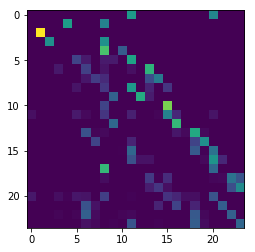

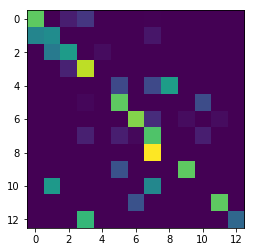

In [8]:
# loop through the piece
for i in range(len(notes)-1):
    if pitches[i] in pitch_id and pitches[i+1] in pitch_id:
        p1 = pitch_id.index(pitches[i])
        p2 = pitch_id.index(pitches[i+1])
        Trans_pitch[p1,p2] = Trans_pitch[p1,p2] + 1
    if durs[i] in dur_id and durs[i+1] in dur_id:
        d1 = dur_id.index(durs[i])
        d2 = dur_id.index(durs[i+1])
        Trans_dur[d1,d2] = Trans_dur[d1,d2] + 1
print("before normalization")
print("Trans pitch freq:\n",Trans_pitch)
print("Trans dur freq:\n",Trans_dur)
# normalization
row_sums = Trans_pitch.sum(axis=1)
Trans_pitch = Trans_pitch / row_sums[:, np.newaxis]
row_sums = Trans_dur.sum(axis=1)
Trans_dur = Trans_dur / row_sums[:, np.newaxis]
# visualize
print("after normalization")
print("Trans pitch prob:\n",np.around(Trans_pitch,2))
print("Trans dur prob:\n",np.around(Trans_dur,2))
plt.imshow(Trans_pitch)
figure()
plt.imshow(Trans_dur)

In [9]:
def matrix2notes(m):
    # first sort the matrix to make sure starting time is in order
    m = array(m)
    m = m[argsort(m[:,0]),:]
    # transfer the databack to note list
    notes=[midi.Note(start=m[i,0], end=m[i,1], pitch=int(m[i,2]), velocity= int(m[i,3]) ) 
                            for i in range(size(m,0))]
    return notes

In [10]:
N = 100; p_i = 0; d_i = 0; # p and d are indix of pitch_id and dur_id
# empty note matrix
notes2 = np.zeros((N,4))
# first row 
notes2[0,[0,1,2]] = [0, dur_id[d_i], pitch_id[p_i]]
# roll the dice to generate the rest of the piece
for i in range(1,N):
    p_i = np.random.choice(np.arange(len(pitch_id)), p = Trans_pitch[p_i,:])
    d_i = np.random.choice(np.arange(len(dur_id)), p = Trans_dur[d_i,:])
    offset = notes2[i-1,1]
    notes2[i,[0,1,2]] = [offset, offset + dur_id[d_i], pitch_id[p_i]]
# assign velocity and tempo
notes2[:,3] = 100
notes2[:,[0,1]] = notes2[:,[0,1]] * dur_unit
#print(notes2)
# transfer matrix back to notes
notes2 = matrix2notes(notes2);
# substitute the original notes
midi_data.instruments[0].notes = notes2 
# save and display
wave = midi_data.instruments[0].synthesize(fs = 44100)
IPython.display.Audio(data=wave, rate=44100) 
midi_data.write('./remix.mid')
